In [1]:
from numpy import pi, sin, cos, abs, exp, max
import numpy as np
from tqdm.notebook import trange, tqdm

from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [2]:
a = 0
b = 2

def f(x, y):
    return 2*x*y

def y(x):
    return exp(x**2)

def divide_evenly(a, b, l):
    # n-1 bc: | 1 | 2 | 3 | - we divide on 4 points with 3 steps
    step = (b-a)/(l-1)
    return [a+i*step for i in range(l)] 

n = int(input('N'))
print(f'a: {a}\nb: {b}\nN: {n}')

N 1000


a: 0
b: 2
N: 1000


In [3]:
x_list = divide_evenly(a, b, n)

In [4]:
y_list = [y(x_list[0])]
for i in range(n-1):
    prediction = y_list[i] + (x_list[i]-x_list[i-1])*f(x_list[i],y_list[i])
    correct = y_list[i] + (x_list[i]-x_list[i-1])*(
        (f(x_list[i], y_list[i]) + f(x_list[i+1], prediction)) / 2
    )
    y_list.append(correct)

In [5]:
delta = [abs(y_i - y(x_i)) for (y_i, x_i) in zip(y_list, x_list)]
# delta

In [6]:
table = PrettyTable()
table.field_names = ["x", "~y(x)", "y(x)", 'd']
for x_i, y_i, d_i in zip(x_list, y_list, delta):
    table.add_row([x_i, y_i, y(x_i), d_i])
print(table)


+----------------------+--------------------+--------------------+-----------------------+
|          x           |       ~y(x)        |        y(x)        |           d           |
+----------------------+--------------------+--------------------+-----------------------+
|         0.0          |        1.0         |        1.0         |          0.0          |
| 0.002002002002002002 | 0.995995995995996  | 1.000004008020048  |  0.004008012024052099 |
| 0.004004004004004004 | 0.996007971951755  | 1.000016032176578  |  0.00400806022482314  |
| 0.006006006006006006 | 0.9960279322033535 | 1.0000360727587505 | 0.0040081405553969995 |
| 0.008008008008008008 | 0.9960558772308059 | 1.0000641302485127 |  0.004008253017706798 |
| 0.01001001001001001  | 0.9960918077061591 | 1.0001002053206183 |  0.004008397614459147 |
| 0.012012012012012012 | 0.9961357244935196 | 1.0001442988426532 |  0.004008574349133598 |
| 0.014014014014014014 | 0.9961876286490883 | 1.000196411875072  | 0.0040087832259836365 |

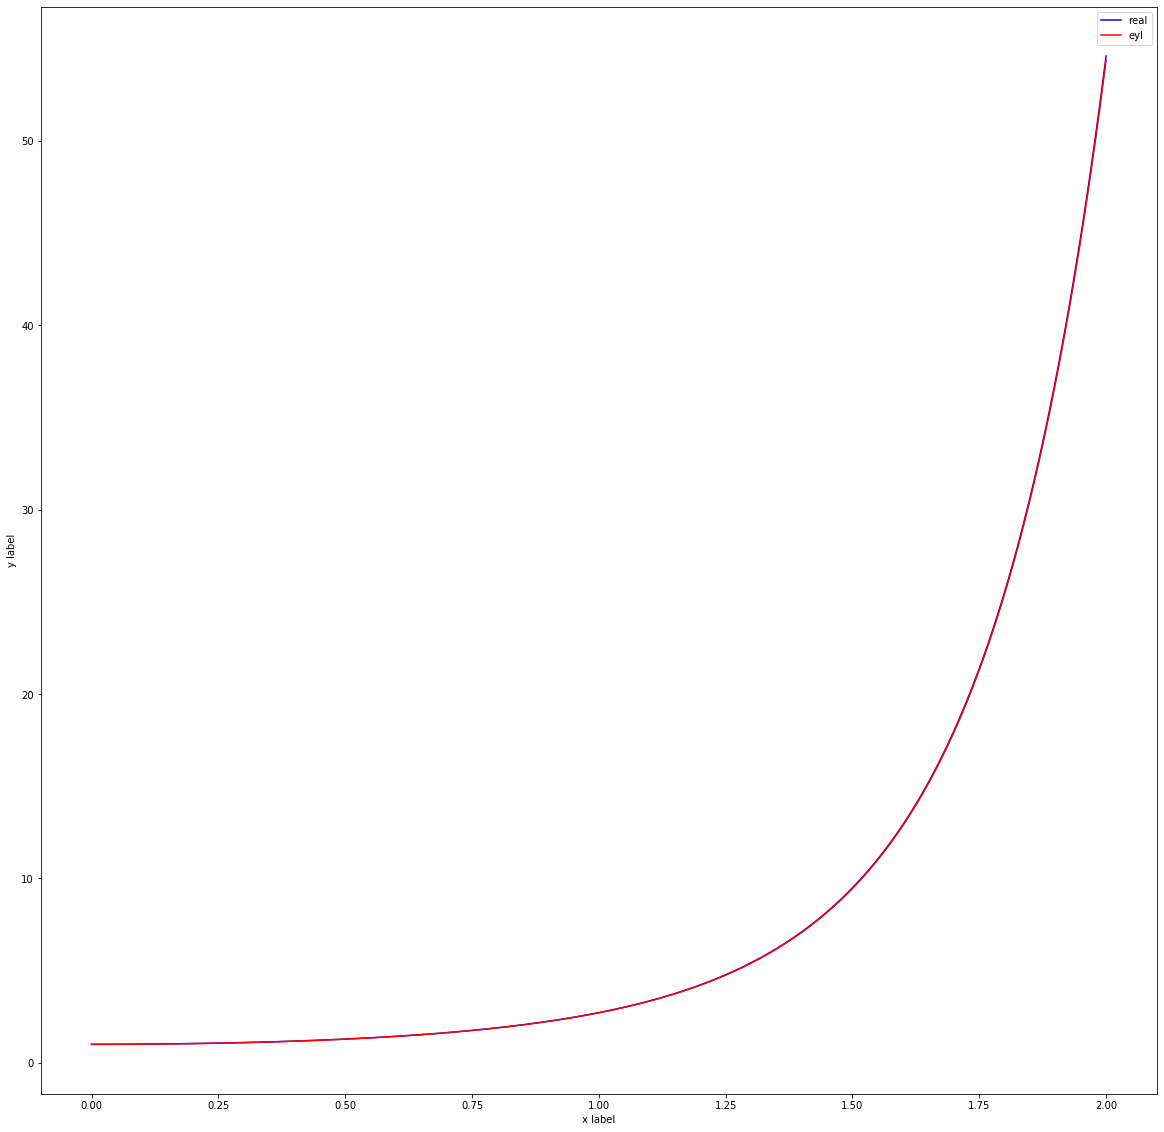

In [7]:
plt.figure(figsize=(20, 20))
plt.plot(x_list, [y(x_i) for x_i in x_list], color='b', label='real')
plt.plot(x_list, y_list, color='r', label='eyl')
plt.xlabel('x label')
plt.ylabel('y label')
plt.legend(loc='best')
plt.show()

In [8]:
def compute_error(N):
    x_lst = divide_evenly(a, b, N)
    y_lst = [y(x_lst[0])]
    for i in range(1, N):
      y_lst.append(y_lst[i-1] + (x_lst[i]-x_lst[i-1])*(f(x_lst[i-1], y_lst[i-1])))
    delta = [np.abs(y_i - y(x_i)) for (y_i, x_i) in zip(y_lst, x_lst)]
    return np.max(delta[:])

errors = []
for N_i in tqdm(range(80000, 1000000, 1)):
    error = compute_error(int(N_i))
    errors.append({'e':error, 'n': N_i})
    if error < 0.01:
        print(f'N* = {int(N_i)}, error = {error}')
        break


N* = 80067, error = 0.009999994156935088


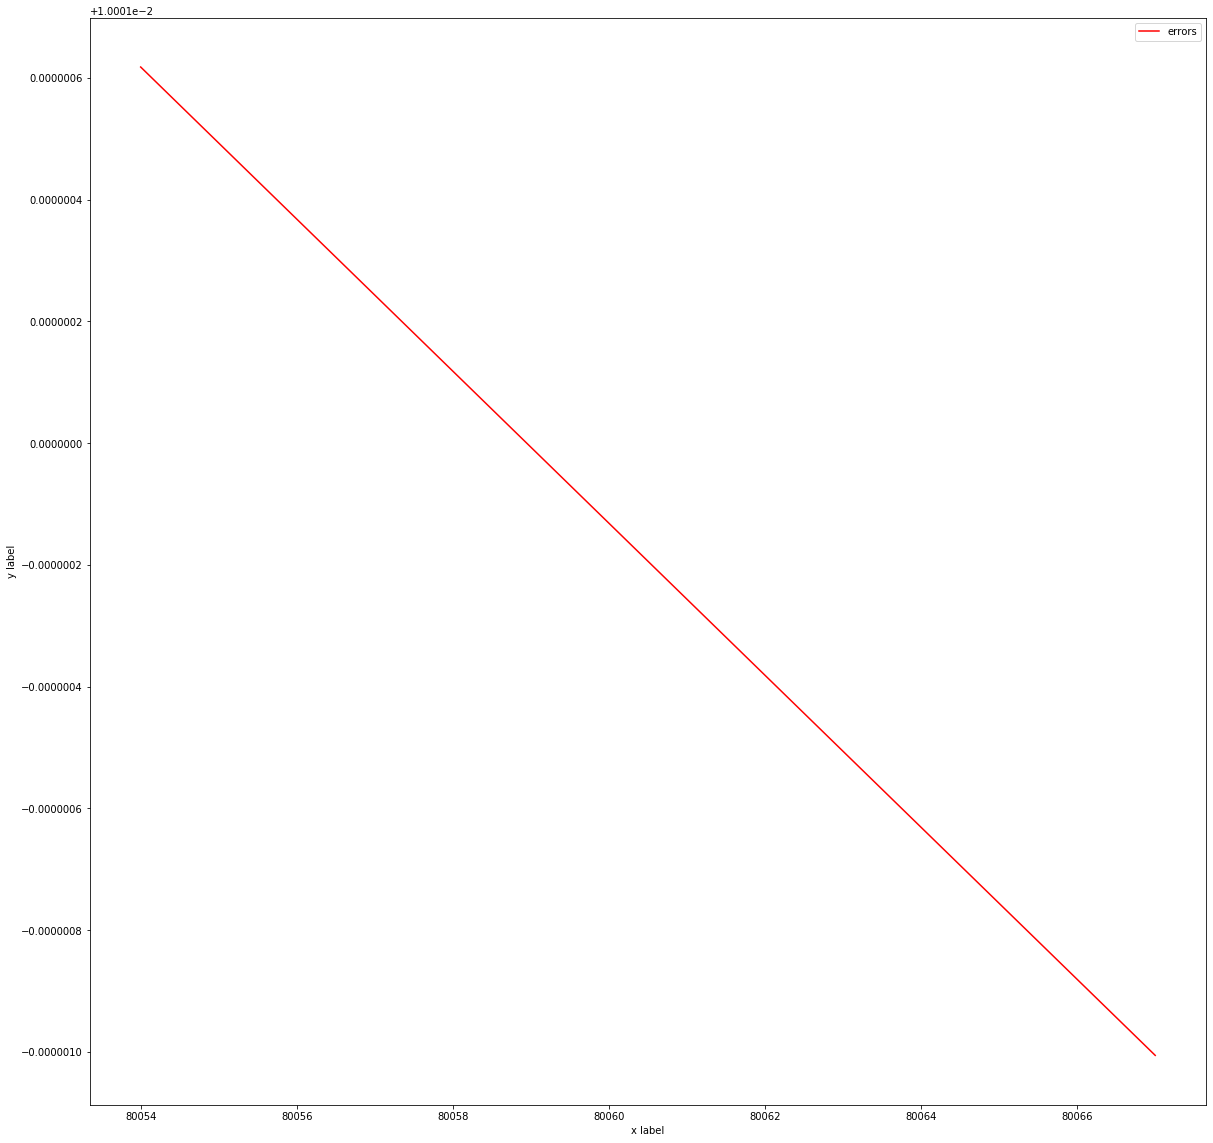

In [9]:
s = slice(int(len(errors)*0.8), len(errors))
plt.figure(figsize=(20, 20))
plt.plot([e['n'] for e in errors[s]], [e['e'] for e in errors[s]], color='r', label='errors')
plt.xlabel('x label')
plt.ylabel('y label')
plt.legend(loc='best')
plt.show()